## Task 2 - Prediction of store sales
Prediction of sales is the central task in this challenge. you want to predict daily sales in
various stores up to 6 weeks ahead of time. This will help the company plan ahead of
time.
The following steps outline the various sub tasks needed to effectively do this:
2.1 Preprocessing
It is important to process the data into a format where it can be fed to a machine learning
model. This typically means converting all non-numeric columns to numeric, handling
NaN values and generating new features from already existing features.

In our case, you have a few datetime columns to preprocess. you can extract the
following from them:
- weekdays
- weekends
- number of days to holidays
- Number of days after holiday
- Beginning of month, mid month and ending of month
- (think of more features to extract), extra marks for it

As a final thing, you have to scale the data. This helps with predictions especially when
using machine learning algorithms that use Euclidean distances. you can use the
standard scaler in sklearn for this.
2.2 Building models with sklearn pipelines
At this point, all our features are numeric. Since our problem is a regression problem, you
can narrow down the list of algorithms you can use for modelling.
A reasonable starting point will be to use any of the tree based algorithms. Random
forests Regressor will make for a good start.
Also, for the sake of this challenge, work with sklearn pipelines. This makes modeling
modular and more reproducible. Working with pipelines will also significantly reduce
your workload when you are moving your setup into files for the next part of the
challenge. Extra marks will be awarded for doing this.
2.3 Choose a loss function
Loss functions indicate how well our model is performing. This means that the loss
functions affect the overall output of sales prediction.
Different loss functions have different use cases.
In this challenge, you’re allowed to choose your own loss function. you need to defend
the loss function you choose for this challenge. Feel free to be creative with your choice.
You might want to use loss functions that are easily interpretable.
2.4 Post Prediction analysis
Explore the feature importance from our modelling. Creatively deduce a way to estimate
the confidence interval of your predictions. Extra marks will be given for this.
2.5 Serialize models

To serve the models you built above, you need to serialize them. Save the model with
the timestamp(eg. 10-08-2020-16-32-31-00.pkl). This is necessary so that you can track
predictions from various models.
Assume that you’ll make daily predictions. This means you’ll have various models for
predictions hence the reason for serializing the models in the format above.
2.6 Building model with deep learning
Deep Learning techniques can be used to predict various outcomes including but not
limited to future sales. Your task is to create a deep learning model of the Long Short
Term Memory which is a type of Recurrent Neural Network .
You can use either Tensorflow or Pytorch libraries for model building. The model should
not be very deep (Two layers) due to the computational requirements, it should
comfortably run in google colab.
1. Isolate the Rossmann Store Sales dataset into time series data
2. Check whether your time Series Data is Stationary
3. Depending on your conclusion from 2 above difference your time series data
4. Check for autocorrelation and partial autocorrelation of your data
5. Transform the time series data into supervised learning data by creating a new
y(target) column. For example as illustrated here in the Sliding Window For Time
Series Data section
6. Scale your data in the (-1, 1) range
7. Build a LSTM Regression model to predict the next sale.
2.7 Using MLFlow to serve the prediction
Use the code snippet provided by mlflow to make inference on your test data

In [1]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
import eli5
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
train_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\train.csv")
test_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\test.csv")
store = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\store.csv")

In [4]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [7]:
train_df = pd.merge(train_df,store,how="inner",on="Store")
test_df = pd.merge(test_df,store,how="inner",on="Store")

In [8]:
train_df.sample(6)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
974270,1069,7,2015-06-14,0,0,0,0,0,0,a,c,18050.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
526590,578,3,2014-08-13,8641,951,1,0,0,1,d,a,12700.0,4.0,2013.0,0,NaN,NaN,NaN
174653,194,1,2015-01-05,8166,637,1,1,0,1,d,c,16970.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
798306,876,1,2014-07-28,13877,1294,1,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
177211,196,6,2013-03-02,3379,531,1,0,0,0,c,a,3850.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
350589,385,4,2015-05-07,7720,619,1,1,0,0,d,a,4580.0,9.0,2007.0,0,NaN,NaN,NaN


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
train_df.shape

(1017209, 18)

In [11]:
train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [12]:
train_df["CompetitionDistance"].replace(np.nan,train_df["CompetitionDistance"].mean(),inplace=True)
train_df.fillna(0,inplace=True)

In [13]:
train_df["Store"].nunique()

1115

In [14]:
train_df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [15]:
train_df["Date"] = pd.to_datetime(train_df["Date"])

In [16]:
train_df["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [17]:
train_df["Customers"].describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [18]:
train_df["Open"].unique()

array([1, 0], dtype=int64)

In [19]:
train_df["Promo"].unique()

array([1, 0], dtype=int64)

In [20]:
train_df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [21]:
train_df["StateHoliday"].replace("0",0,inplace=True)

In [22]:
train_df["SchoolHoliday"].unique()

array([1, 0], dtype=int64)

In [23]:
train_df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [24]:
train_df["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [25]:
train_df["CompetitionDistance"].describe()

count    1.017209e+06
mean     5.430086e+03
std      7.705298e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [26]:
train_df["Promo2"].unique()

array([0, 1], dtype=int64)

In [27]:
train_df["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  0.,  3.,  6.,  5.,  1.,  2.,  7.])

In [28]:
train_df["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [29]:
train_df["Promo2SinceWeek"].unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [30]:
train_df["Promo2SinceYear"].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [31]:
train_df["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [32]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1017209.0,5430.085652,7705.297659,20.0,710.0,2330.0,6880.0,75860.0
CompetitionOpenSinceMonth,1017209.0,4.926878,4.283543,0.0,0.0,4.0,9.0,12.0
CompetitionOpenSinceYear,1017209.0,1370.172511,935.363448,0.0,0.0,2006.0,2011.0,2015.0


In [33]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [34]:
train_df["Day"] = train_df["Date"].dt.day
train_df["Month"] = train_df["Date"].dt.month
train_df["Year"] = train_df["Date"].dt.year
train_df["Day_Name"] = train_df["Date"].dt.day_name()
train_df.drop("Date",axis=1,inplace=True)

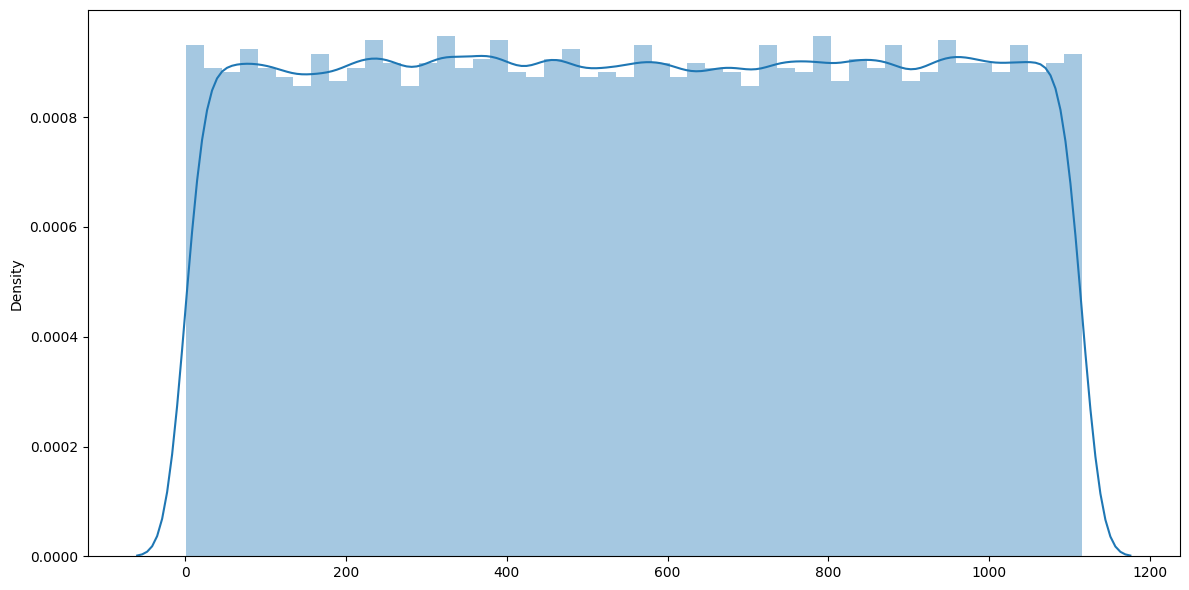

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["Store"])
plt.tight_layout()

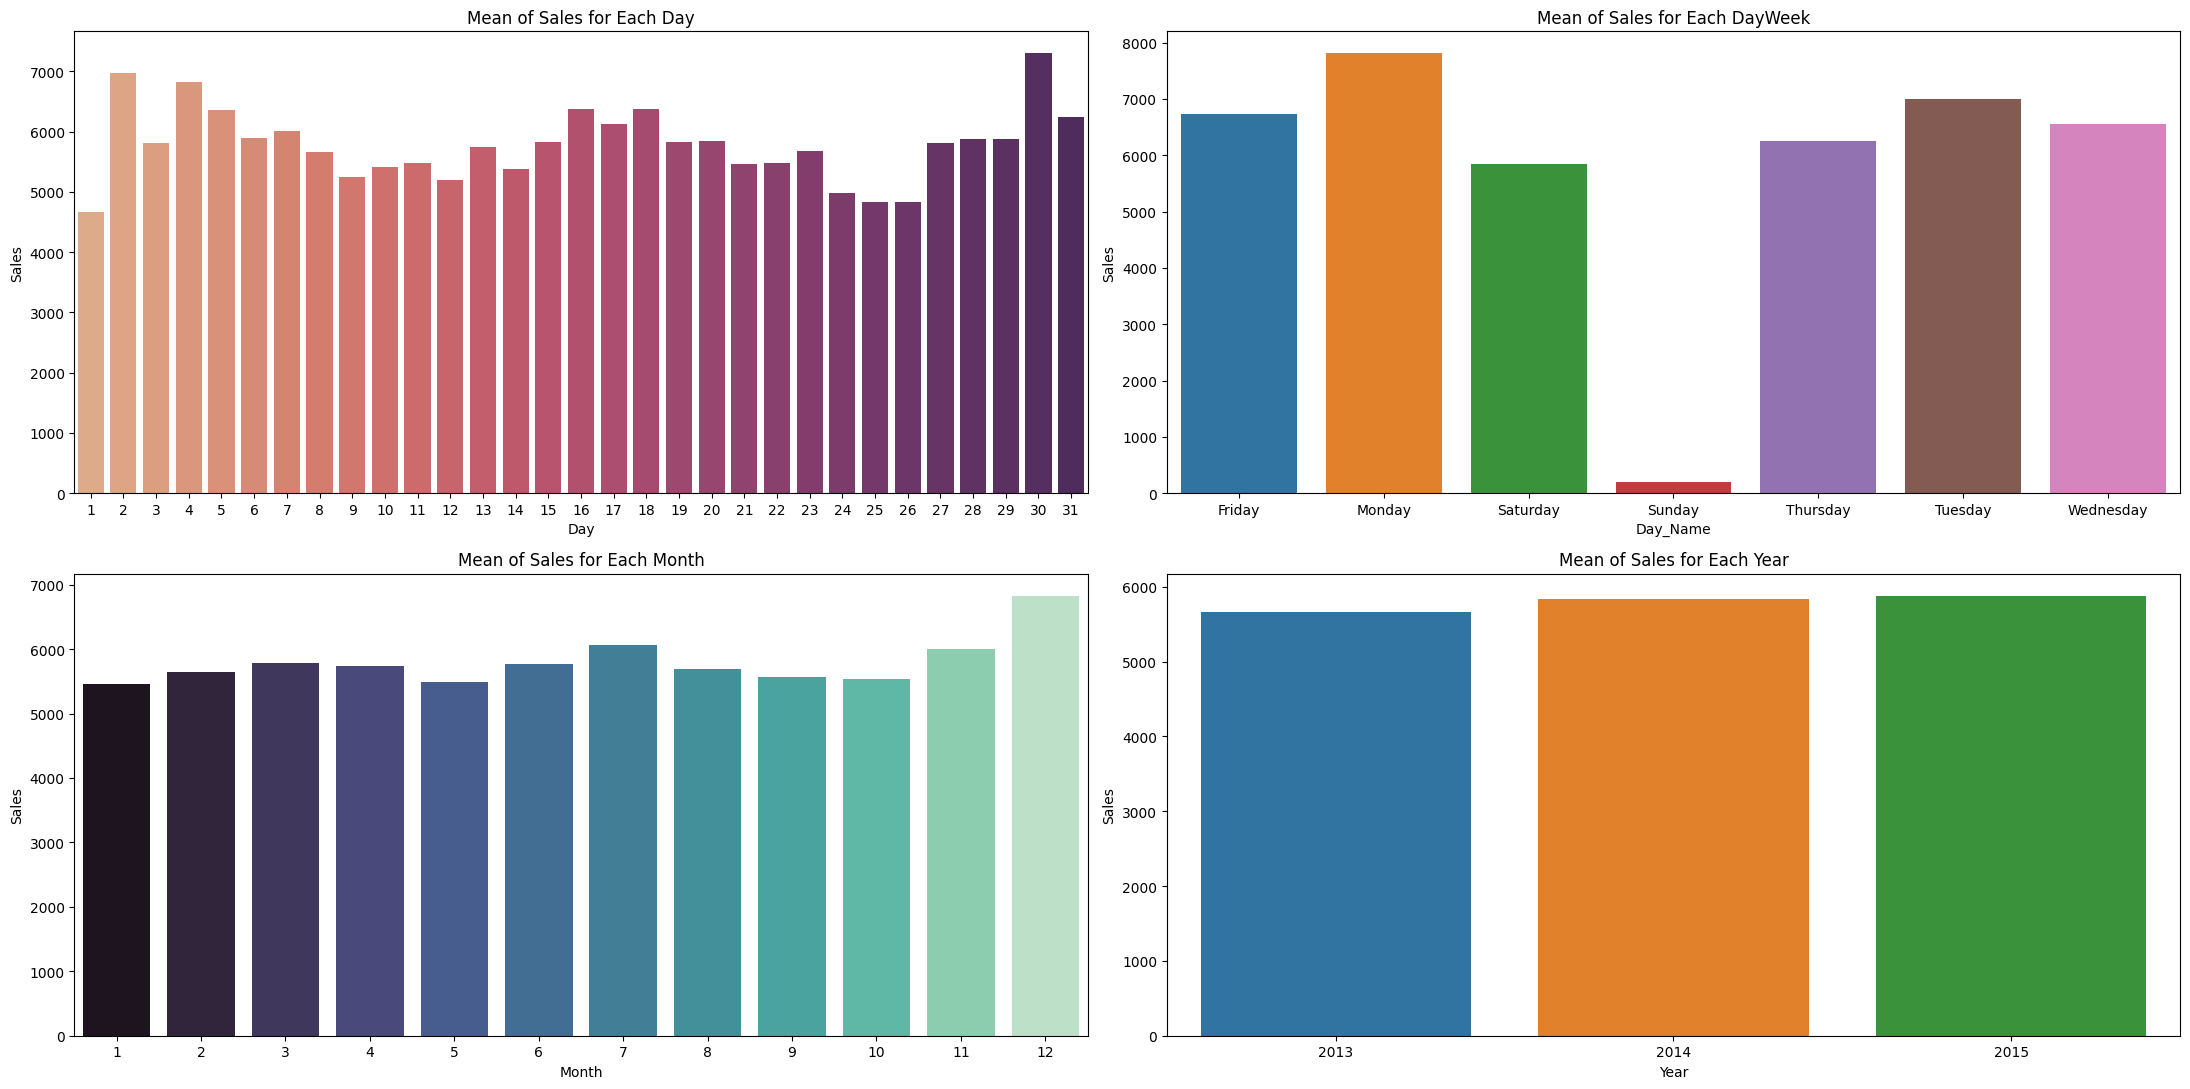

In [36]:
day_df = train_df.groupby("Day")["Sales"].mean().to_frame().reset_index()
day_name_df = train_df.groupby("Day_Name")["Sales"].mean().to_frame().reset_index()
month_df = train_df.groupby("Month")["Sales"].mean().to_frame().reset_index()
year_df = train_df.groupby("Year")["Sales"].mean().to_frame().reset_index()
fig , ax = plt.subplots(2,2,figsize = (22,11))
ax1 = sns.barplot(x=day_df["Day"],y=day_df["Sales"],ax=ax[0,0],palette="flare")
ax1.set_title("Mean of Sales for Each Day")
ax2 = sns.barplot(x=day_name_df["Day_Name"],y=day_name_df["Sales"],ax=ax[0,1])
ax2.set_title("Mean of Sales for Each DayWeek")
ax3 = sns.barplot(x=month_df["Month"],y=month_df["Sales"],ax=ax[1,0],palette="mako")
ax3.set_title("Mean of Sales for Each Month")
ax4 = sns.barplot(x=year_df["Year"],y=year_df["Sales"],ax=ax[1,1])
ax4.set_title("Mean of Sales for Each Year")
plt.tight_layout()

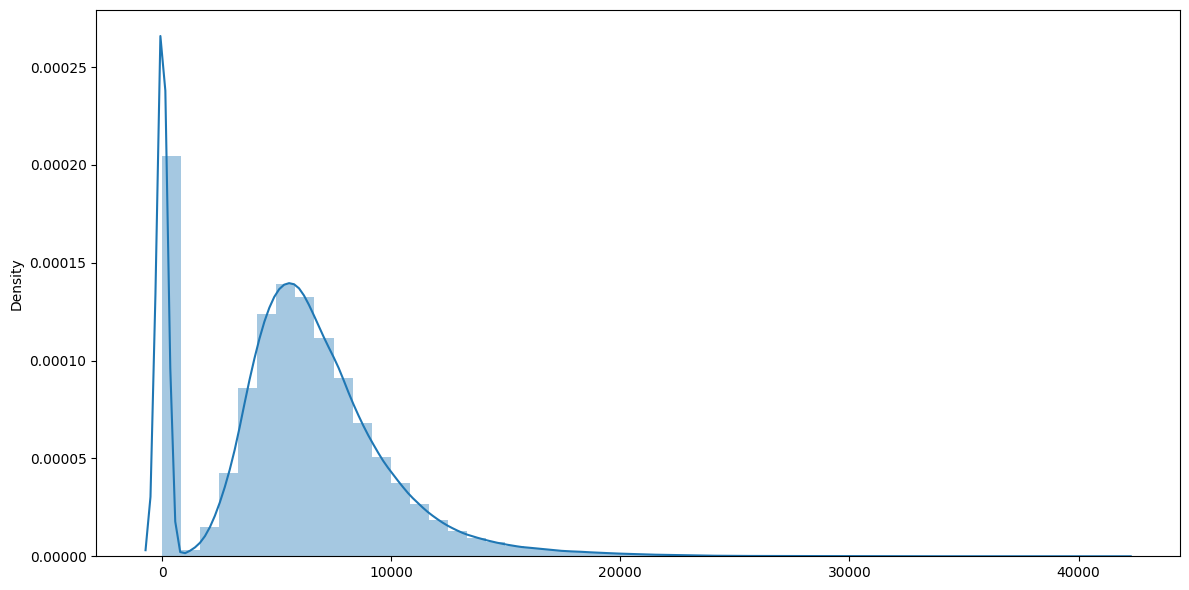

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["Sales"])
plt.tight_layout()

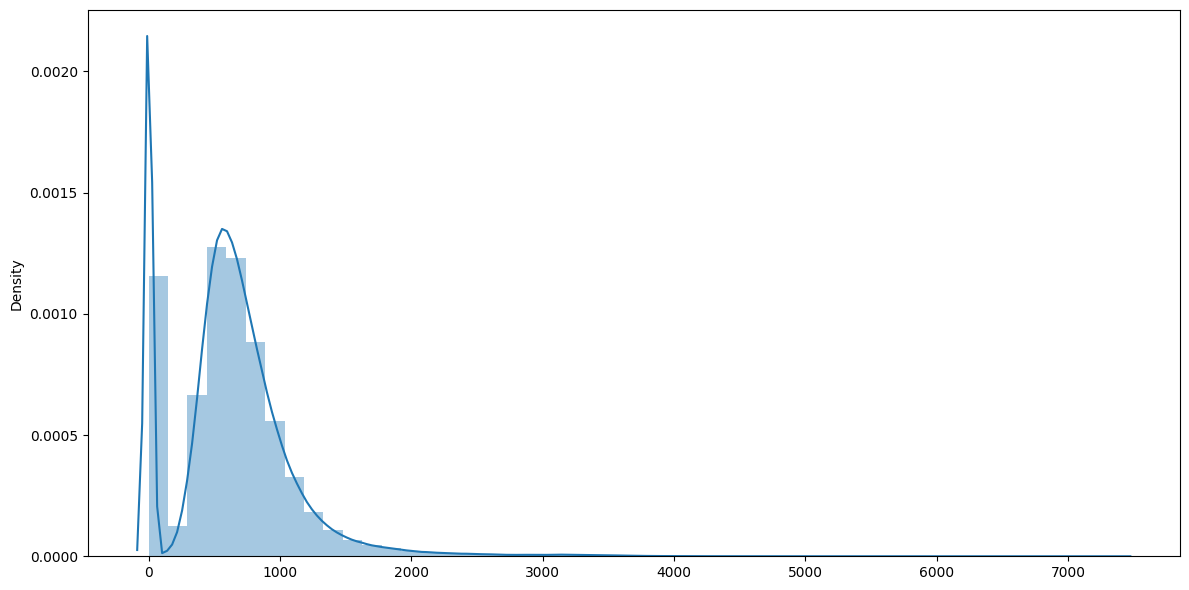

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["Customers"])
plt.tight_layout()

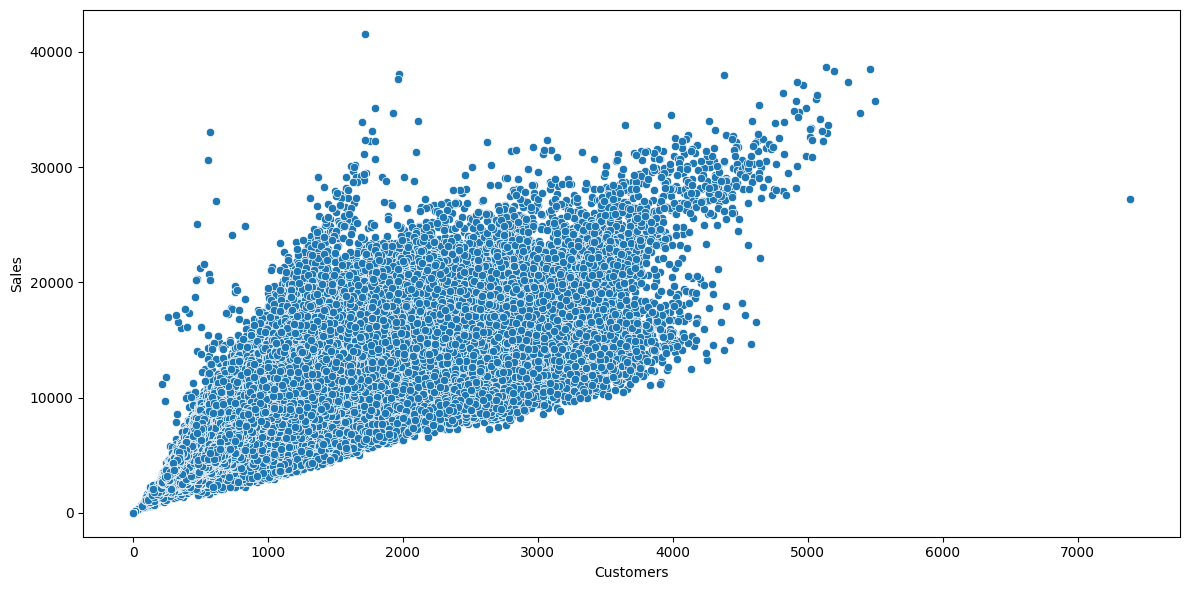

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = train_df["Customers"],y=train_df["Sales"])
plt.tight_layout()

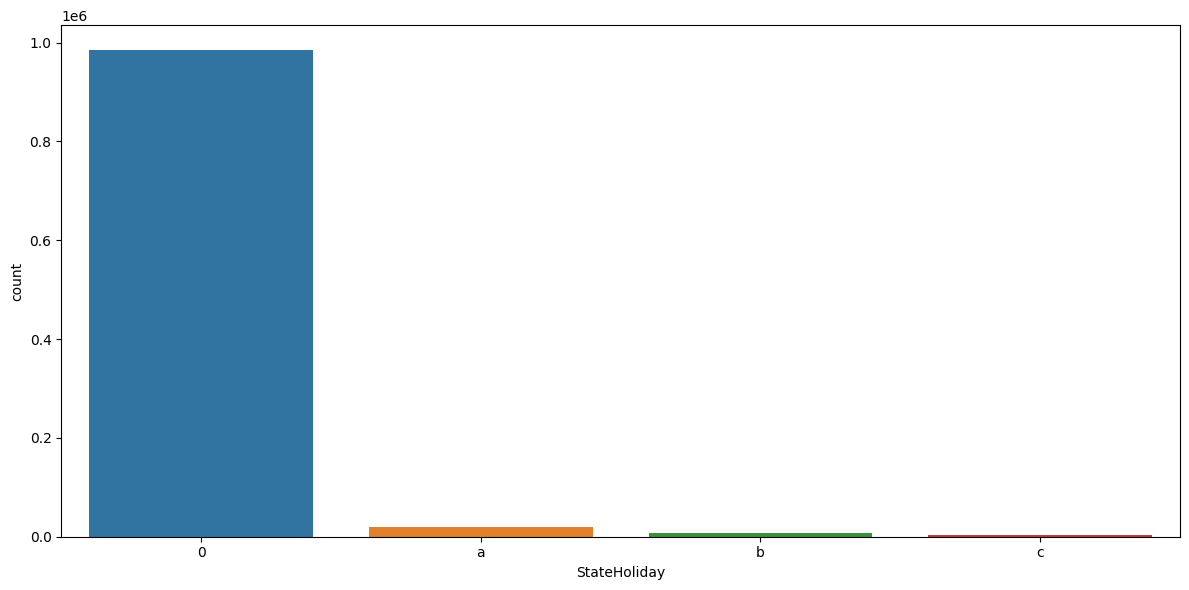

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["StateHoliday"])
plt.tight_layout()

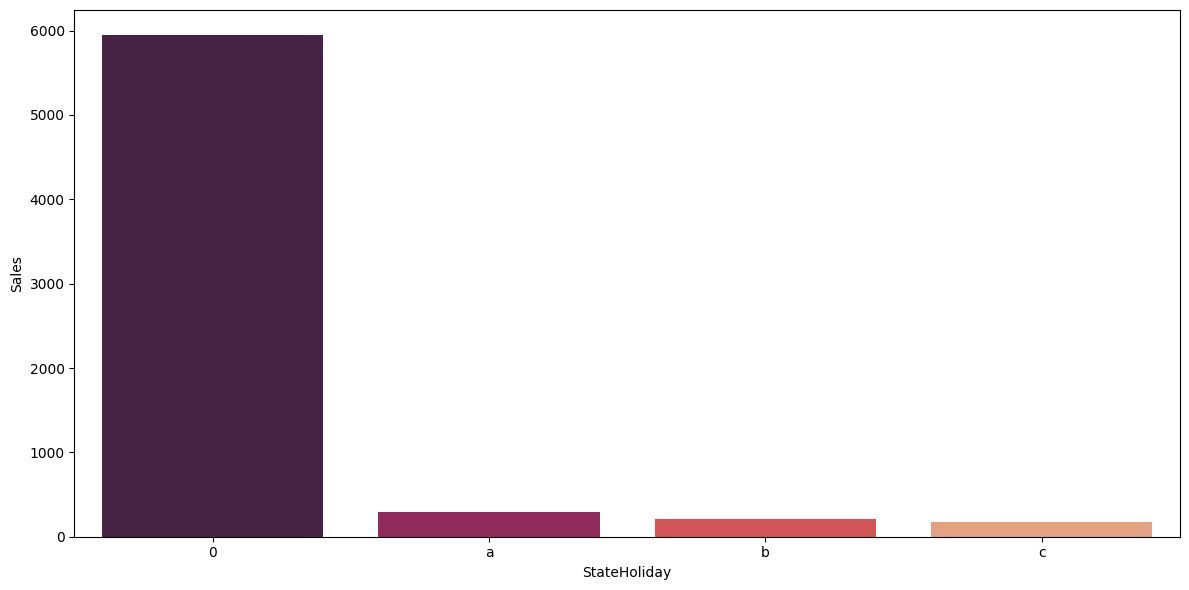

In [41]:
plt.figure(figsize=(12,6))
StateHoliday_df = train_df.groupby("StateHoliday")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=StateHoliday_df["StateHoliday"],y=StateHoliday_df["Sales"],palette="rocket")
plt.tight_layout()

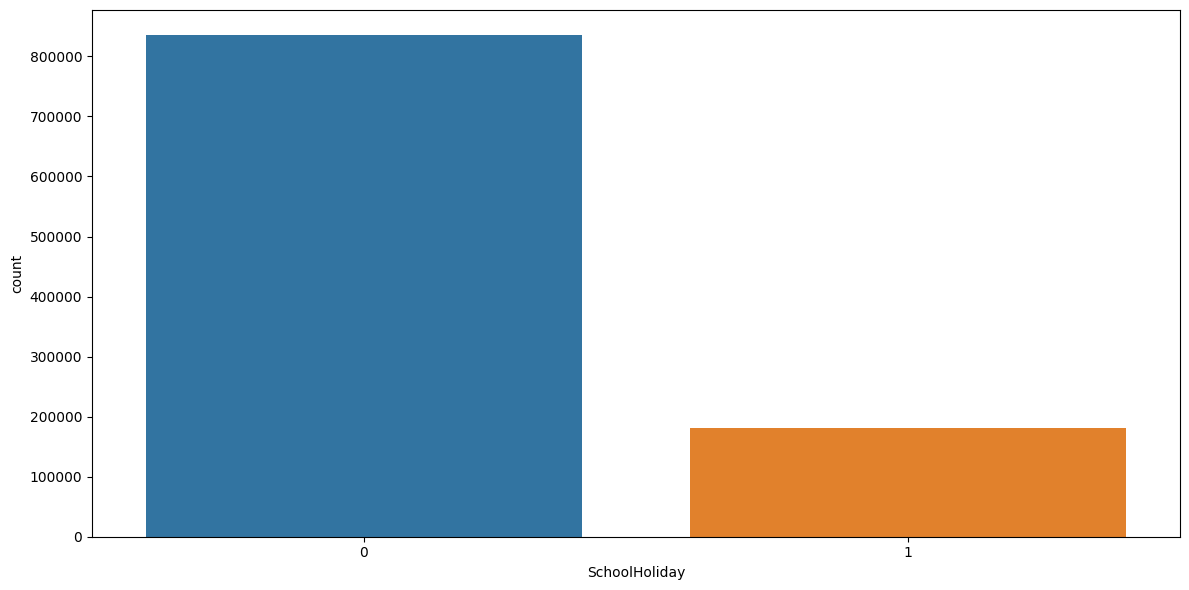

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["SchoolHoliday"])
plt.tight_layout()

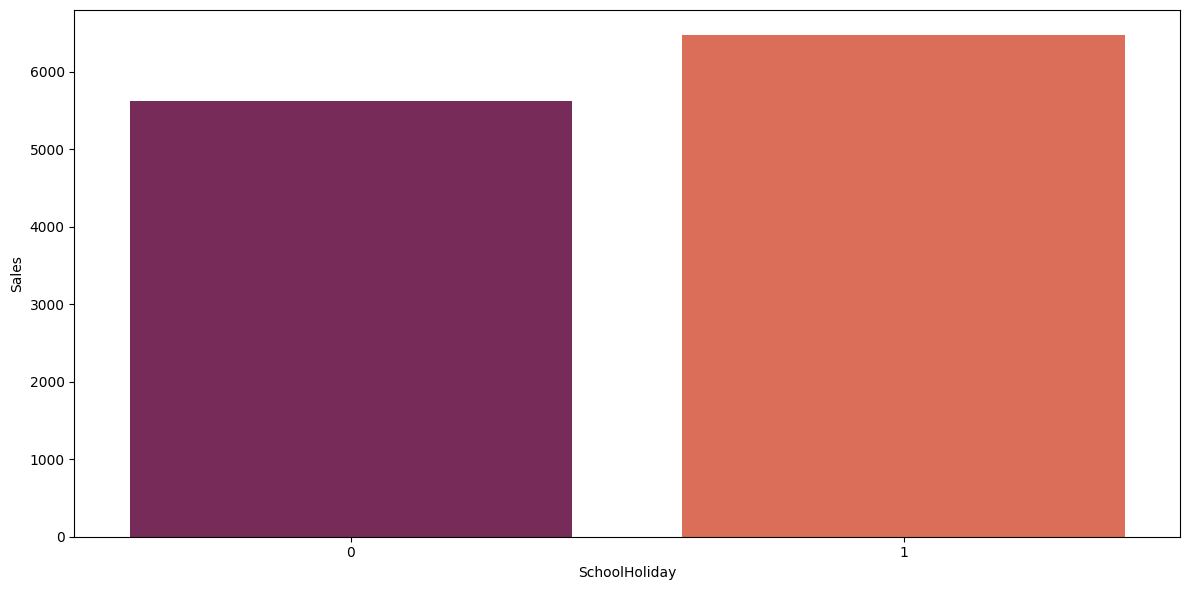

In [43]:
plt.figure(figsize=(12,6))
SchoolHoliday_df = train_df.groupby("SchoolHoliday")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=SchoolHoliday_df["SchoolHoliday"],y=SchoolHoliday_df["Sales"],palette="rocket")
plt.tight_layout()

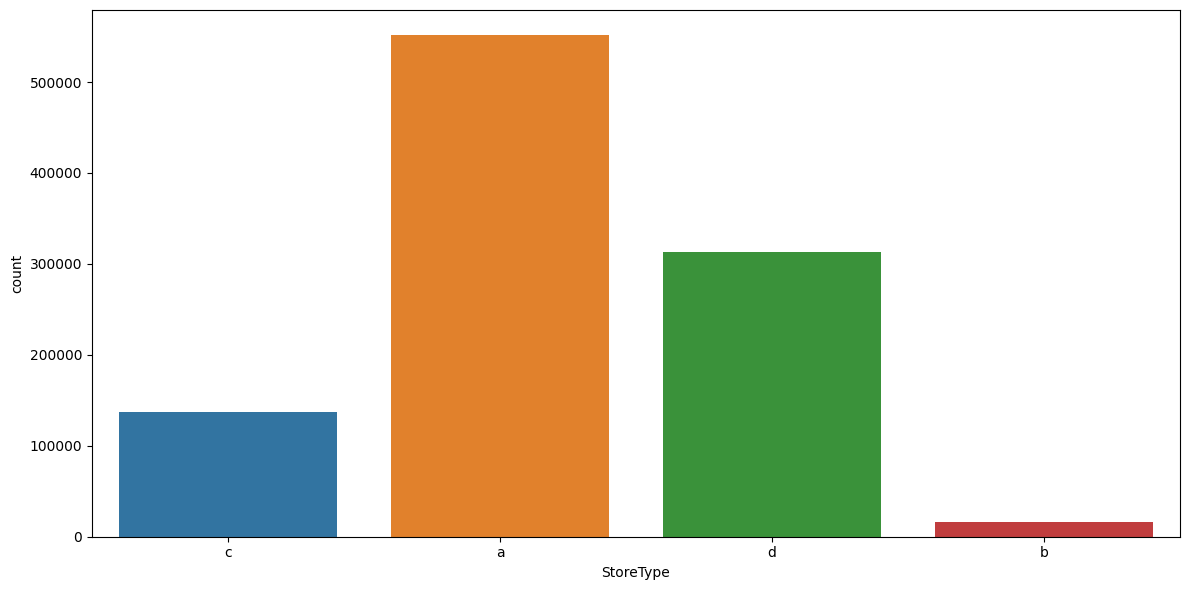

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["StoreType"])
plt.tight_layout()

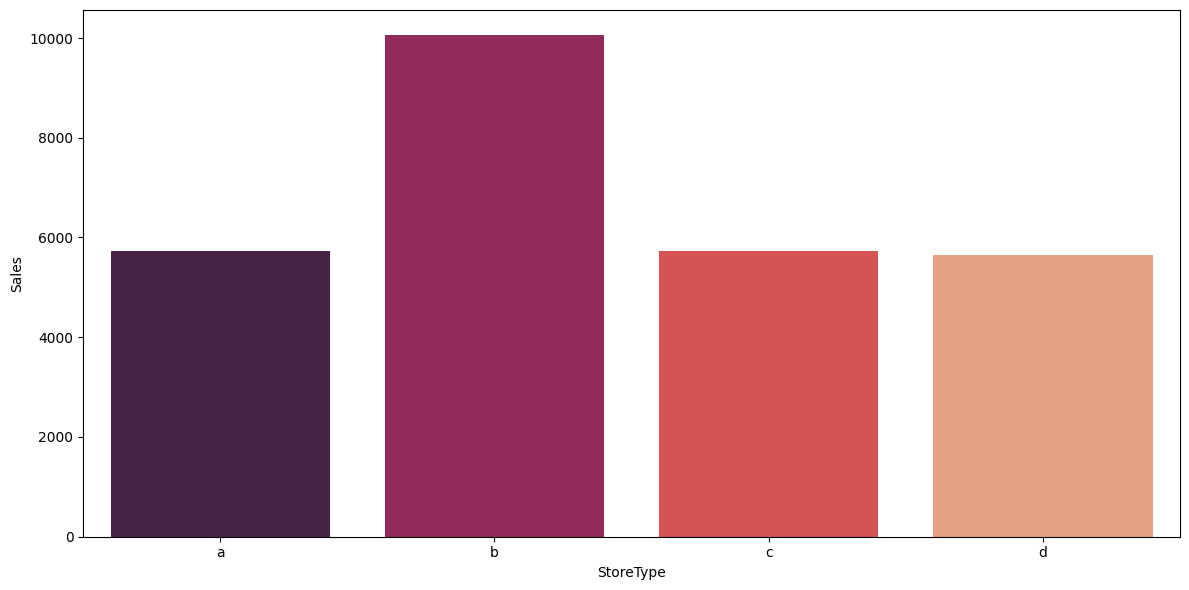

In [45]:
plt.figure(figsize=(12,6))
StoreType_df = train_df.groupby("StoreType")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=StoreType_df["StoreType"],y=StoreType_df["Sales"],palette="rocket")
plt.tight_layout()

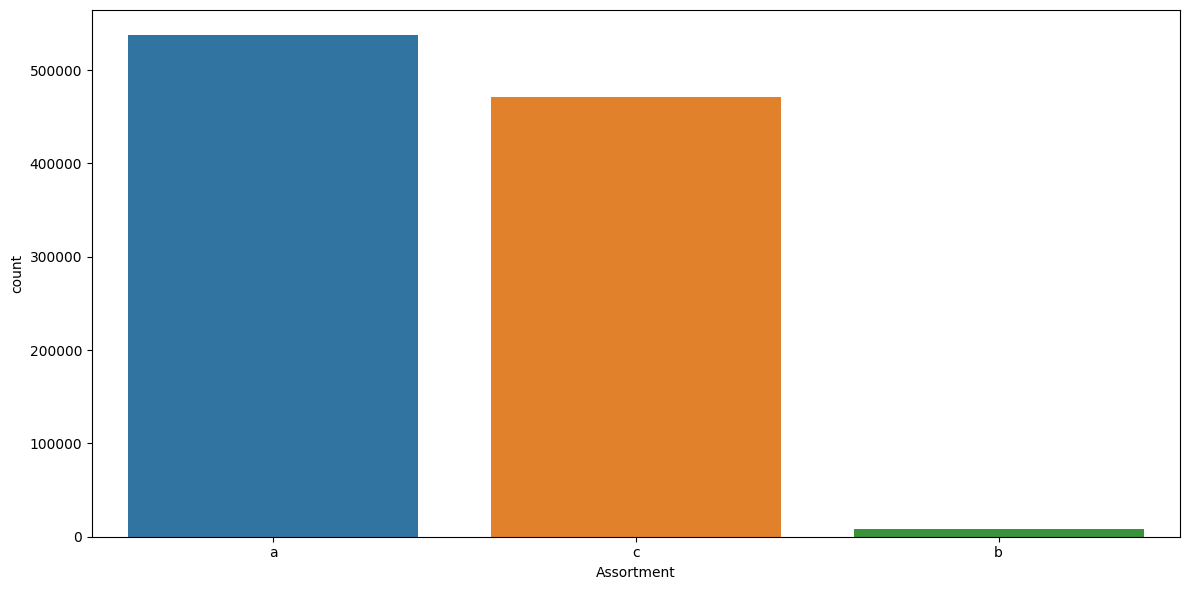

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["Assortment"])
plt.tight_layout()

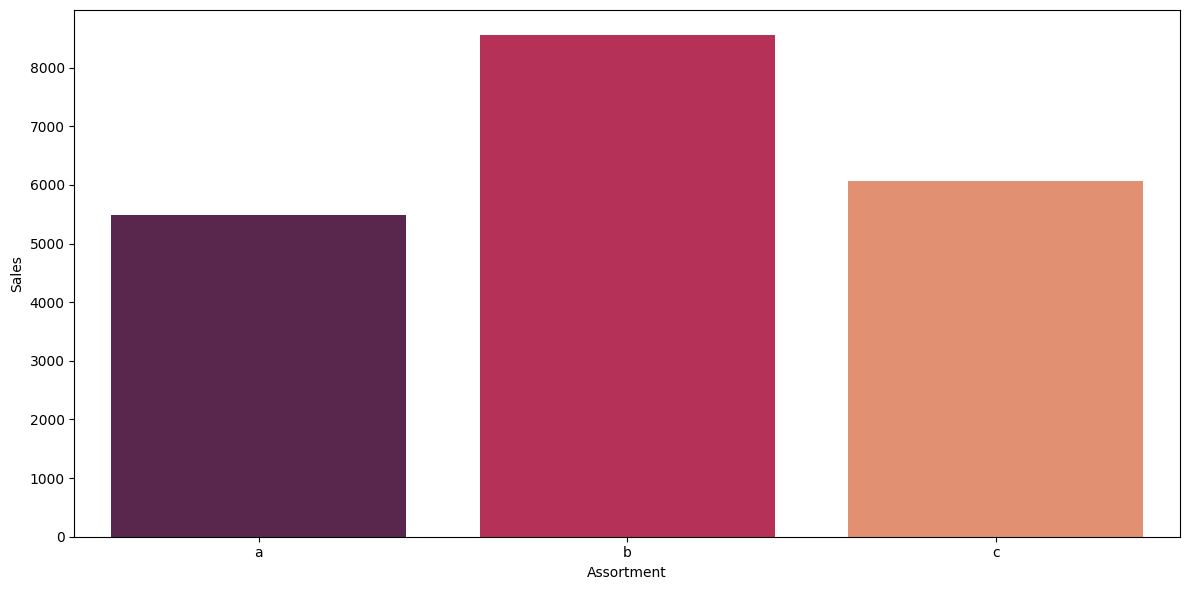

In [47]:
plt.figure(figsize=(12,6))
Assortment_df = train_df.groupby("Assortment")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=Assortment_df["Assortment"],y=Assortment_df["Sales"],palette="rocket")
plt.tight_layout()

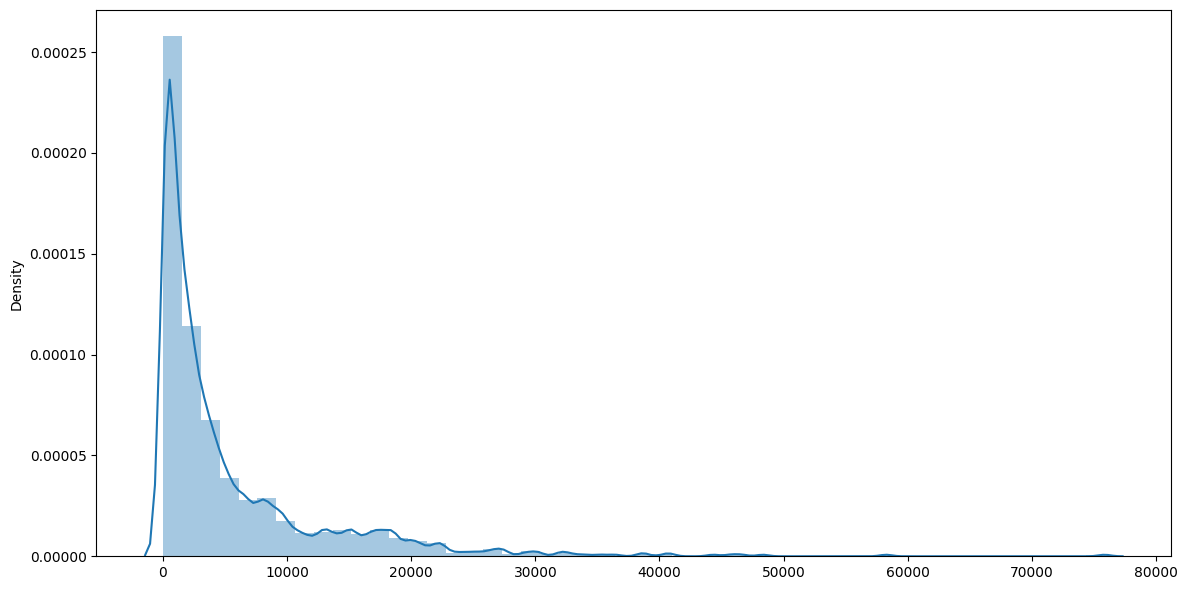

In [48]:
plt.figure(figsize=(12,6))
sns.distplot(x = train_df["CompetitionDistance"])
plt.tight_layout()

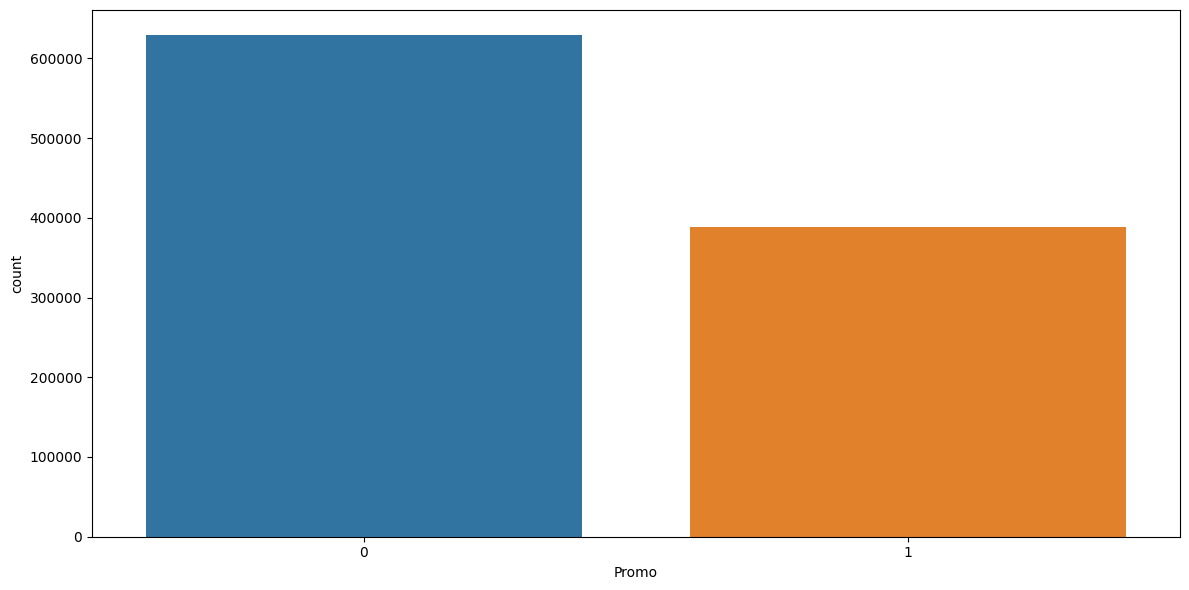

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["Promo"])
plt.tight_layout()

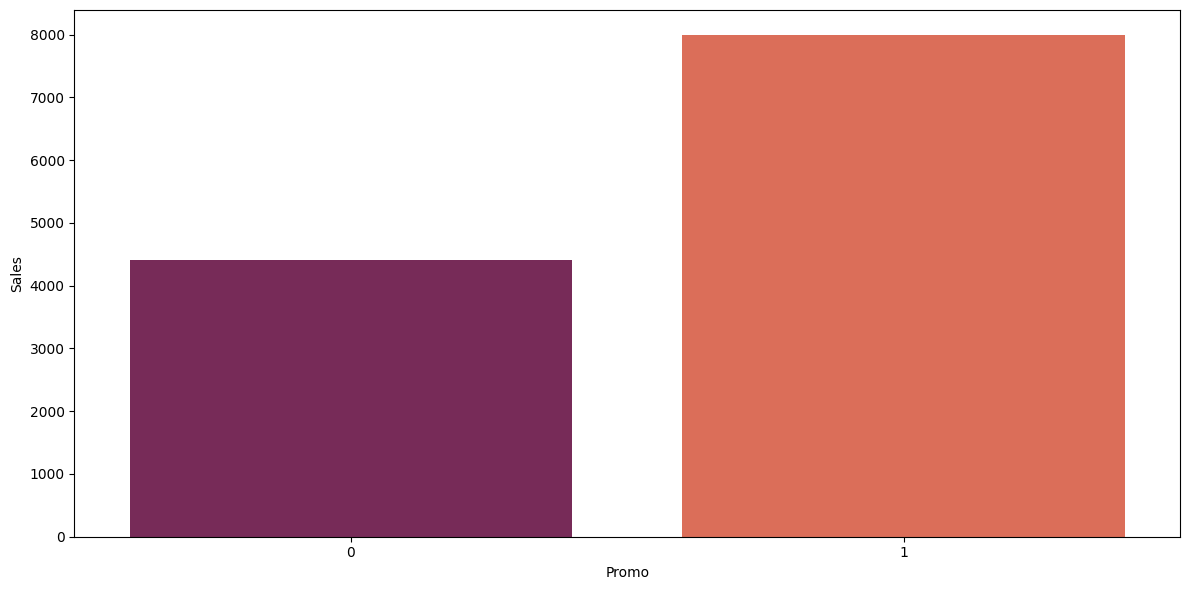

In [50]:
plt.figure(figsize=(12,6))
Promo_df = train_df.groupby("Promo")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=Promo_df["Promo"],y=Promo_df["Sales"],palette="rocket")
plt.tight_layout()

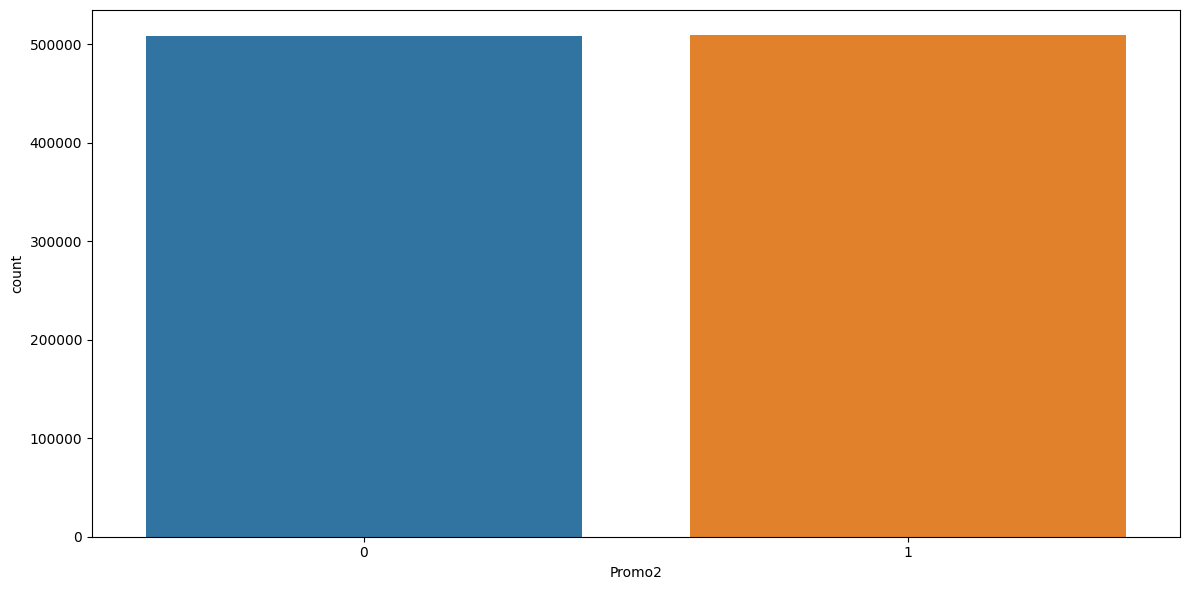

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x = train_df["Promo2"])
plt.tight_layout()

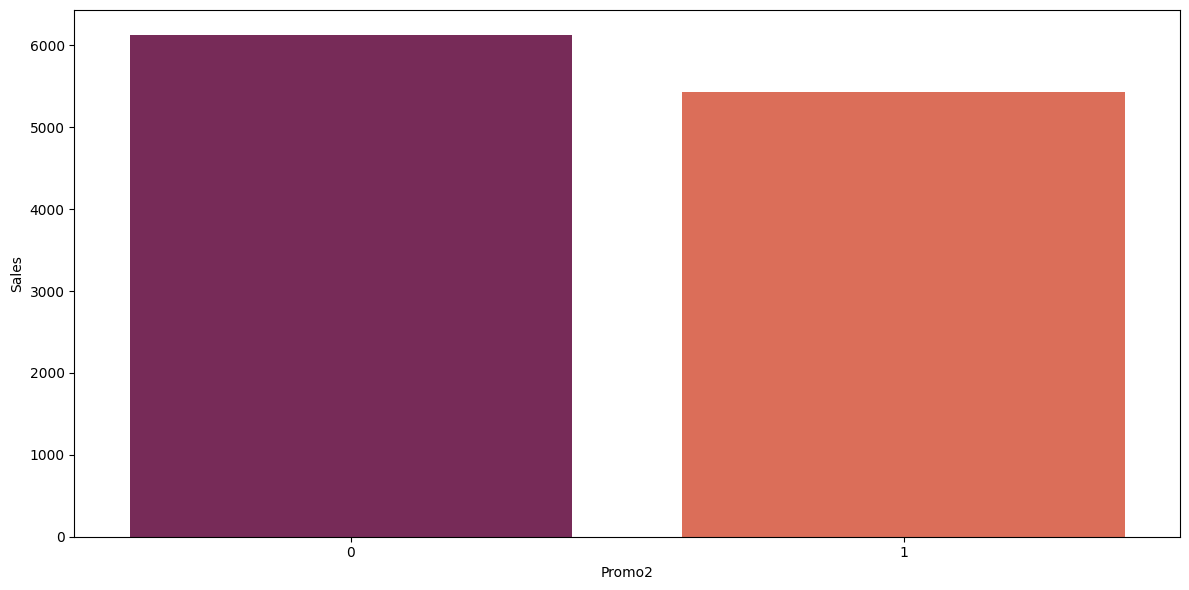

In [52]:
plt.figure(figsize=(12,6))
Promo2_df = train_df.groupby("Promo2")["Sales"].mean().to_frame().reset_index()
sns.barplot(x=Promo2_df["Promo2"],y=Promo2_df["Sales"],palette="rocket")
plt.tight_layout()

In [53]:
train_df.drop("Day_Name",axis=1,inplace=True)

In [54]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,30,7,2015
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,29,7,2015
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,28,7,2015
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,27,7,2015


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

In [56]:
train_df["StateHoliday"].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [57]:
train_df["StateHoliday"] = train_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [58]:
train_df["StoreType"].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [59]:
train_df["StoreType"] = train_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [60]:
train_df["Assortment"].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [61]:
train_df["Assortment"] = train_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [62]:
train_df["PromoInterval"].value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [63]:
train_df["PromoInterval"] = train_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [64]:
StateHoliday_dumm = pd.get_dummies(train_df["StateHoliday"])
train_df =pd.concat([train_df,StateHoliday_dumm],axis=1)
train_df.drop("StateHoliday",axis=1,inplace=True)

In [65]:
StoreType_dumm = pd.get_dummies(train_df["StoreType"])
train_df =pd.concat([train_df,StoreType_dumm],axis=1)
train_df.drop("StoreType",axis=1,inplace=True)

In [66]:
Assortment_dumm = pd.get_dummies(train_df["Assortment"])
train_df =pd.concat([train_df,Assortment_dumm],axis=1)
train_df.drop("Assortment",axis=1,inplace=True)

In [67]:
PromoInterval_dumm = pd.get_dummies(train_df["PromoInterval"])
train_df =pd.concat([train_df,PromoInterval_dumm],axis=1)
train_df.drop("PromoInterval",axis=1,inplace=True)

In [68]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,Christmas,Easter holiday,No Holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,31,7,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,1,4,5020,546,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,30,7,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1,3,4782,523,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,29,7,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,1,2,5011,560,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,28,7,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,1,1,6102,612,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,27,7,2015,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [69]:
train_df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,Christmas,Easter holiday,No Holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
Store,1.000000,-8.483588e-06,0.005126,0.024325,-0.000047,5.786226e-05,0.000641,-0.026394,-0.032893,-0.008794,0.008488,0.011053,0.008520,2.259853e-05,0.001467,0.000290,1.443168e-04,-1.086178e-04,-0.000542,0.000665,0.005579,0.001412,0.060986,-0.051492,-0.006140,0.002661,0.019328,8.035330e-03,0.012181,-0.013087,-0.008488
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.000025,0.000008,0.000007,0.000168,0.000208,0.000168,5.136457e-03,-0.005362,0.001937,-1.345413e-03,-4.066836e-02,0.052889,-0.040981,-0.000034,-0.000019,-0.000039,0.000071,0.000052,-0.000051,-0.000007,-3.017220e-07,0.000198,-0.000019,-0.000168
Sales,0.005126,-4.621250e-01,1.000000,0.894711,0.678472,4.523447e-01,0.085124,-0.019210,-0.012431,0.002749,-0.091040,-0.044143,-0.091056,-1.161188e-02,0.048768,0.023519,-9.261768e-02,-1.174965e-01,0.254216,-0.203028,-0.010076,0.139940,-0.005140,-0.022854,-0.080494,0.068772,0.065473,-4.366787e-02,-0.034946,-0.053267,0.091040
Customers,0.024325,-3.864447e-01,0.894711,1.000000,0.616768,3.161695e-01,0.071568,-0.102780,-0.015188,0.000489,-0.150159,-0.098323,-0.150138,-4.473140e-03,0.038179,-0.001212,-8.300669e-02,-1.045224e-01,0.226608,-0.180900,0.060679,0.366726,0.034059,-0.189039,-0.031864,-0.017859,0.275905,-6.547287e-02,-0.078401,-0.063053,0.150159
Open,-0.000047,-5.289625e-01,0.678472,0.616768,1.000000,2.950423e-01,0.086171,0.007981,-0.000200,-0.001144,-0.008309,-0.007436,-0.008308,3.342796e-02,-0.000681,-0.001009,-1.376851e-01,-1.751578e-01,0.378378,-0.302107,-0.004373,0.051233,-0.004709,-0.005538,-0.006438,-0.000522,0.038631,-3.608057e-03,-0.005269,-0.002074,0.008309
Promo,0.000058,-3.929253e-01,0.452345,0.316169,0.295042,1.000000e+00,0.067483,0.000138,-0.000039,-0.000034,-0.000983,-0.001210,-0.000983,-1.083245e-01,-0.011747,0.024300,-4.996370e-02,1.984658e-02,0.012353,-0.004034,0.000204,0.000108,0.000223,-0.000414,-0.000296,0.000290,0.000039,-6.029887e-07,-0.001154,0.000107,0.000983
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.071568,0.086171,6.748281e-02,1.000000,-0.003684,-0.001688,-0.001801,-0.006909,-0.006679,-0.006912,3.053818e-02,0.103282,-0.036535,1.364053e-01,1.590977e-01,-0.148651,0.029126,-0.000687,0.001825,0.001557,-0.000899,0.002464,-0.002576,0.000608,-2.109399e-03,-0.004427,-0.002624,0.006909
CompetitionDistance,-0.026394,-2.458113e-05,-0.019210,-0.102780,0.007981,1.380672e-04,-0.003684,1.000000,-0.034400,-0.002894,-0.139704,-0.123647,-0.139767,4.860997e-05,0.003573,0.000702,3.517291e-04,-2.652260e-04,0.000784,-0.000972,-0.037179,-0.071210,-0.097901,0.131616,-0.141214,0.150360,-0.049883,-5.064480e-02,-0.082631,-0.054952,0.139704
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.012431,-0.015188,-0.000200,-3.919081e-05,-0.001688,-0.034400,1.000000,0.784968,-0.081027,-0.108546,-0.080952,-1.213118e-05,-0.001037,-0.000203,-1.021516e-04,7.718315e-05,0.001179,-0.001450,0.037553,-0.039814,0.015645,-0.041428,0.100431,-0.091268,-0.051397,-1.794370e-02,-0.056377,-0.031330,0.081027
CompetitionOpenSinceYear,-0.008794,6.677520e-06,0.002749,0.000489,-0.001144,-3.429440e-05,-0.001801,-0.002894,0.784968,1.000000,-0.097433,-0.124378,-0.097363,-1.137384e-05,-0.000897,-0.000176,-8.833719e-05,6.667669e-05,0.002091,-0.002573,0.058360,-0.039637,0.034669,-0.078003,0.127335,-0.115449,-0.066661,-6.843751e-02,-0.010996,-0.073972,0.097433


In [70]:
train_df.corr()["Sales"]

Store                        0.005126
DayOfWeek                   -0.462125
Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
CompetitionDistance         -0.019210
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
Promo2SinceYear             -0.091056
Day                         -0.011612
Month                        0.048768
Year                         0.023519
Christmas                   -0.092618
Easter holiday              -0.117497
No Holiday                   0.254216
Public Holiday              -0.203028
Type A                      -0.010076
Type B                       0.139940
Type C                      -0.005140
Type D                      -0.022854
Basic                       -0.080494
Extended                     0.068772
Extra       

In [71]:
X = train_df.drop(["Sales","Customers"],axis=1)
Y = train_df["Sales"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [73]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [74]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),AdaBoostRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","KNeighborsRegressor","DecisionTreeRegressor","GradientBoostingRegressor"]
MSE=[]
r_2=[]
RSE_ = []
accuracy = []
RMSE = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    RSE_.append(round(RSE(y_test,y_pre),5))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy,"RMSE":RMSE})


In [75]:
d

,Modelling Name,MSE,R_2,RSE,Accuracy,RMSE
0,LinearRegression,6.339681e+06,0.572731,2517.88049,57.273149,2517.872244
1,RandomForestRegressor,7.502800e+05,0.949434,866.18989,94.943420,866.187055
2,AdaBoostRegressor,1.033821e+07,0.303247,3215.31878,30.324718,3215.308246
3,KNeighborsRegressor,5.128506e+06,0.654360,2264.62798,65.435968,2264.620558
4,DecisionTreeRegressor,1.403619e+06,0.905402,1184.74828,90.540181,1184.744399
5,GradientBoostingRegressor,4.899988e+06,0.669761,2213.59901,66.976084,2213.591757


In [76]:
model = RandomForestRegressor(n_estimators=42,n_jobs=-1)
model.fit(X,Y)

RandomForestRegressor(n_estimators=42, n_jobs=-1)

In [77]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [79]:
test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [80]:
test_df["Open"].replace(np.nan,1,inplace=True)

In [81]:
test_df["CompetitionDistance"].replace(np.nan,test_df["CompetitionDistance"].mean(),inplace=True)
test_df.fillna(0,inplace=True)

In [82]:
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [83]:
test_df["StateHoliday"].replace("0",0,inplace=True)

In [84]:
test_df["Day"] = test_df["Date"].dt.day
test_df["Month"] = test_df["Date"].dt.month
test_df["Year"] = test_df["Date"].dt.year
test_df.drop("Date",axis=1,inplace=True)

In [85]:
test_df["StateHoliday"] = test_df["StateHoliday"].replace("a","Public Holiday").replace("b","Easter holiday").replace("c","Christmas").replace(0,"No Holiday")

In [86]:
test_df["StoreType"] = test_df["StoreType"].replace("a","Type A").replace("b","Type B").replace("c","Type C").replace("d","Type D")

In [87]:
test_df["Assortment"] = test_df["Assortment"].replace("a","Basic").replace("b","Extra").replace("c","Extended")

In [88]:
test_df["PromoInterval"] = test_df["PromoInterval"].replace(0,"No PromoInterval").replace("Jan,Apr,Jul,Oct","From Jan to Oct").replace("Feb,May,Aug,Nov","From Feb to Nov").replace("Mar,Jun,Sept,Dec","From Mar to Dec")

In [89]:
StateHoliday_dumm = pd.get_dummies(test_df["StateHoliday"])
test_df =pd.concat([test_df,StateHoliday_dumm],axis=1)
test_df.drop("StateHoliday",axis=1,inplace=True)

In [90]:
StoreType_dumm = pd.get_dummies(test_df["StoreType"])
test_df =pd.concat([test_df,StoreType_dumm],axis=1)
test_df.drop("StoreType",axis=1,inplace=True)

In [91]:
Assortment_dumm = pd.get_dummies(test_df["Assortment"])
test_df =pd.concat([test_df,Assortment_dumm],axis=1)
test_df.drop("Assortment",axis=1,inplace=True)

In [92]:
PromoInterval_dumm = pd.get_dummies(test_df["PromoInterval"])
test_df =pd.concat([test_df,PromoInterval_dumm],axis=1)
test_df.drop("PromoInterval",axis=1,inplace=True)

In [93]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,No Holiday,Public Holiday,Type A,Type B,Type C,Type D,Basic,Extended,Extra,From Feb to Nov,From Jan to Oct,From Mar to Dec,No PromoInterval
0,1,1,4,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,17,9,2015,1,0,0,0,1,0,1,0,0,0,0,0,1
1,857,1,3,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,16,9,2015,1,0,0,0,1,0,1,0,0,0,0,0,1
2,1713,1,2,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,15,9,2015,1,0,0,0,1,0,1,0,0,0,0,0,1
3,2569,1,1,1.0,1,0,1270.0,9.0,2008.0,0,0.0,0.0,14,9,2015,1,0,0,0,1,0,1,0,0,0,0,0,1
4,3425,1,7,0.0,0,0,1270.0,9.0,2008.0,0,0.0,0.0,13,9,2015,1,0,0,0,1,0,1,0,0,0,0,0,1


In [94]:
ids = test_df["Id"]
test_df.drop("Id",axis=1,inplace=True)

In [95]:
test_df["Christmas"] = 0
test_df["Easter holiday"] = 0

In [96]:
test_df = test_df[['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Day', 'Month', 'Year', 'Christmas',
       'Easter holiday', 'No Holiday', 'Public Holiday', 'Type A', 'Type B',
       'Type C', 'Type D', 'Basic', 'Extended', 'Extra', 'From Feb to Nov',
       'From Jan to Oct', 'From Mar to Dec', 'No PromoInterval']]

In [97]:
Predictions = model.predict(test_df)

In [98]:
Prediction = pd.DataFrame({"Id":ids,"Sales":Predictions})

In [99]:
Prediction.to_csv("submission.csv",index=False)

2.6 Building model with deep learning
Deep Learning techniques can be used to predict various outcomes including but not
limited to future sales. Your task is to create a deep learning model of the Long Short
Term Memory which is a type of Recurrent Neural Network .
You can use either Tensorflow or Pytorch libraries for model building. The model should
not be very deep (Two layers) due to the computational requirements, it should
comfortably run in google colab.
1. Isolate the Rossmann Store Sales dataset into time series data
2. Check whether your time Series Data is Stationary
3. Depending on your conclusion from 2 above difference your time series data
4. Check for autocorrelation and partial autocorrelation of your data
5. Transform the time series data into supervised learning data by creating a new
y(target) column. For example as illustrated here in the Sliding Window For Time
Series Data section
6. Scale your data in the (-1, 1) range
7. Build a LSTM Regression model to predict the next sale.

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\train.csv")
test_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\test.csv")
store_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\rossmann-store-sales\store.csv")

# Display the first few rows of each dataframe
train_df.head(), store_df.head(), test_df.head()

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  
 2              1  
 3              1  
 4              1  ,
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 2      3         a          a              14130.0                       12.0   
 3      4         c          c                620.0                  

In [102]:
# Merge the train and store dataframes
train_df = pd.merge(train_df, store_df, on='Store', how='left')

# Merge the test and store dataframes
test_df = pd.merge(test_df, store_df, on='Store', how='left')

# Display the first few rows of each merged dataframe
train_df.head(), test_df.head()

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [103]:
# Convert 'Date' column to datetime format for both train and test dataframes
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Extract year, month, and day as separate features
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Day'] = test_df['Date'].dt.day

# Now that we've extracted the necessary information from the 'Date' column, we can drop it
train_df.drop('Date', axis=1, inplace=True)
test_df.drop('Date', axis=1, inplace=True)

# Check the updated dataframes
train_df.head(), test_df.head()

(   Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5   5263        555     1      1            0   
 1      2          5   6064        625     1      1            0   
 2      3          5   8314        821     1      1            0   
 3      4          5  13995       1498     1      1            0   
 4      5          5   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1                       11.0                    2007.0       1   
 2       

In [104]:
# Check for missing values in train and test datasets
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing[train_missing > 0], test_missing[test_missing > 0]

(CompetitionDistance            2642
 CompetitionOpenSinceMonth    323348
 CompetitionOpenSinceYear     323348
 Promo2SinceWeek              508031
 Promo2SinceYear              508031
 PromoInterval                508031
 dtype: int64,
 Open                            11
 CompetitionDistance             96
 CompetitionOpenSinceMonth    15216
 CompetitionOpenSinceYear     15216
 Promo2SinceWeek              17232
 Promo2SinceYear              17232
 PromoInterval                17232
 dtype: int64)

In [105]:
# Fill missing values

# For 'CompetitionDistance', we fill missing values with the median distance
train_df['CompetitionDistance'].fillna(train_df['CompetitionDistance'].median(), inplace=True)
test_df['CompetitionDistance'].fillna(test_df['CompetitionDistance'].median(), inplace=True)

# For 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear', we fill missing values with the most frequent value
train_df['CompetitionOpenSinceMonth'].fillna(train_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
train_df['CompetitionOpenSinceYear'].fillna(train_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)

test_df['CompetitionOpenSinceMonth'].fillna(test_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
test_df['CompetitionOpenSinceYear'].fillna(test_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)

# For 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', we fill missing values with zero
promo_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
train_df[promo_cols] = train_df[promo_cols].fillna(0)
test_df[promo_cols] = test_df[promo_cols].fillna(0)

# For 'Open' column in test dataset, fill missing values with 1
test_df['Open'].fillna(1, inplace=True)

# Check if there are any missing values left
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing[train_missing > 0], test_missing[test_missing > 0]


(Series([], dtype: int64), Series([], dtype: int64))

In [106]:
# One-hot encode 'StateHoliday', 'StoreType', 'Assortment' columns
train_df = pd.get_dummies(train_df, columns=['StateHoliday', 'StoreType', 'Assortment'])
test_df = pd.get_dummies(test_df, columns=['StateHoliday', 'StoreType', 'Assortment'])

# Handle 'PromoInterval' column
# First, let's see what unique values it has
print("Unique values in 'PromoInterval' column:")
print(train_df['PromoInterval'].unique())

# It seems like 'PromoInterval' contains either 0 (for no promotion) or a string with comma-separated months.
# Let's create separate binary columns for each possible month in the 'PromoInterval'

# Months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# For each month, create a new column in train and test dataframes
for month in months:
    train_df['PromoInterval_' + month] = train_df['PromoInterval'].apply(lambda x: 1 if month in str(x) else 0)
    test_df['PromoInterval_' + month] = test_df['PromoInterval'].apply(lambda x: 1 if month in str(x) else 0)

# Now that we've extracted the necessary information from the 'PromoInterval' column, we can drop it
train_df.drop('PromoInterval', axis=1, inplace=True)
test_df.drop('PromoInterval', axis=1, inplace=True)

# Check the updated dataframes
train_df.head(), test_df.head()


Unique values in 'PromoInterval' column:
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


(   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
 0      1          5   5263        555     1      1              1   
 1      2          5   6064        625     1      1              1   
 2      3          5   8314        821     1      1              1   
 3      4          5  13995       1498     1      1              1   
 4      5          5   4822        559     1      1              1   
 
    CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
 0               1270.0                        9.0                    2008.0   
 1                570.0                       11.0                    2007.0   
 2              14130.0                       12.0                    2006.0   
 3                620.0                        9.0                    2009.0   
 4              29910.0                        4.0                    2015.0   
 
    Promo2  Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  StateHoliday_0  \
 0       0    

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

# List of numerical columns
num_cols = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day']

# Apply the scaler to the numerical columns
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols]) # Note: we use transform() here, not fit_transform()

# Check the updated dataframes
train_df.head(), test_df.head()


(   Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
 0      1          5   5263        555     1      1              1   
 1      2          5   6064        625     1      1              1   
 2      3          5   8314        821     1      1              1   
 3      4          5  13995       1498     1      1              1   
 4      5          5   4822        559     1      1              1   
 
    CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
 0             0.016482                   0.727273                  0.939130   
 1             0.007252                   0.909091                  0.930435   
 2             0.186050                   1.000000                  0.921739   
 3             0.007911                   0.727273                  0.947826   
 4             0.394119                   0.272727                  1.000000   
 
    Promo2  Promo2SinceWeek  Promo2SinceYear  Year     Month  Day  \
 0       0             0.00

In [108]:
# Separate target variable 'Sales' from the rest of the training dataset
X_train = train_df.drop(['Sales', 'Customers'], axis=1) # We also drop 'Customers' as it's not present in the test dataset
y_train = train_df['Sales']

# Ensure that train and test datasets have the same columns
missing_cols = set(X_train.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[X_train.columns]

# Check the shapes of the datasets
X_train.shape, y_train.shape, test_df.shape


((1017209, 38), (1017209,), (41088, 38))

Deep Learning

In [110]:
pip install torch


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/172.3 MB ? eta -:--:--
                                              0.1/172.3 MB 3.6 MB/s eta 0:00:48
                                              0.3/172.3 MB 3.4 MB/s eta 0:00:51
                                              0.5/172.3 MB 3.6 MB/s eta 0:00:48
                                              0.6/172.3 MB 3.9 MB/s eta 0:00:44
                                              0.8/172.3 MB 3.6 MB/s eta 0:00:48
                                              1.0/172.3 MB 3.8 MB/s eta 0:00:45
                                              1.2/172.3 MB 3.7 MB/s eta 0:00:47
                                              1.4/172.3 MB 4.0 MB/s eta 0:00:44
                                              1.5/172.3 MB 3.8 MB/s eta 0:00:46
                                              1.7/172.3 MB 3.8 MB/s eta 0:00:45
                                              1.9/172.3 MB 3.8 MB/s eta 0:00:45
                                              

In [111]:
#imports
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Device

In [112]:

import torch
import subprocess

def GPU():
    if torch.cuda.is_available() == True:
        device = 'cuda'
        templist = [1, 2, 3]
        templist = torch.FloatTensor(templist).to(device)
        print("Cuda torch working : ", end="")
        print(templist.is_cuda)
        print("current device no. : ", end="")
        print(torch.cuda.current_device())
        print("GPU device count : ", end="")
        print(torch.cuda.device_count())
        print("GPU name : ", end="")
        print(torch.cuda.get_device_name(0))
        print("device : ", device)
        # Execute the nvidia-smi command using subprocess
        try:
            output = subprocess.check_output(['nvidia-smi']).decode('utf-8')
            print("nvidia-smi output:")
            print(output)
        except (subprocess.CalledProcessError, FileNotFoundError) as e:
            print("Error executing nvidia-smi command:", str(e))
    elif torch.backends.mps.is_available() == True:
        print("Apple device detected\nActivating Apple Silicon GPU")
        device = torch.device("mps")
    else:
        print("cant use gpu , activating cpu")
        device = 'cpu'

    return device
device = GPU()
print(device)

cant use gpu , activating cpu
cpu


In [113]:
# Convert the dataframes into PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device) # reshape to (n_samples, 1)
X_test_tensor = torch.tensor(test_df.values, dtype=torch.float32).to(device)

In [114]:
# Split data into training and validation
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [115]:
# Create data loaders
batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [116]:
# Define the model architecture
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
).to(device) # move the model to the device

In [117]:
import torch.nn.functional as F


class FFN(nn.Module):
    def __init__(self, input_dim):
        super(FFN, self).__init__()
        
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.batchnorm1 = nn.BatchNorm1d(256)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.batchnorm4 = nn.BatchNorm1d(32)
        
    def forward(self, x):
        x = F.relu(self.batchnorm1(self.layer1(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm2(self.layer2(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm3(self.layer3(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm4(self.layer4(x)))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x
model = FFN(X_train_tensor.shape[1]).to(device)

In [118]:
# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [119]:
# Store losses for plot
train_losses = []
val_losses = []


# Placeholder for best validation loss
best_val_loss = float('inf')

# Loop

1. train
2. calculate val loss while torch no grad
3. if val loss is smaller , save model
4. print train val loss

In [120]:
import torch
import time
print("device : ",device)
# Training loop
start_time = time.time()  # Start time
NB_EPOCH  = 100
for epoch in range(NB_EPOCH):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)  
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)
    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)

    elapsed_time = time.time() - start_time  # Elapsed time
    epochs_done = epoch + 1
    epochs_remaining = NB_EPOCH - epochs_done
    avg_time_per_epoch = elapsed_time / epochs_done
    remaining_time = avg_time_per_epoch * epochs_remaining

    print('Epoch: {} \tTraining Loss: {:.2f} \tValidation Loss: {:.2f} \tRemaining Time: {:f}s'.format(epoch + 1, train_loss, val_loss, remaining_time))

    if val_loss < best_val_loss:
        print('Val loss decreased ({:.1} --> {:.1f}). Saving model'.format(best_val_loss, val_loss))
        torch.save(model.state_dict(), 'model.pt')
        best_val_loss = val_loss


device :  cpu
Epoch: 1 	Training Loss: 47863761.34 	Validation Loss: 47366230.67 	Remaining Time: 6928.341197s
Val loss decreased (inf --> 47366230.7). Saving model
Epoch: 2 	Training Loss: 46237606.06 	Validation Loss: 45380736.17 	Remaining Time: 6677.805456s
Val loss decreased (5e+07 --> 45380736.2). Saving model
Epoch: 3 	Training Loss: 43290235.28 	Validation Loss: 43107543.80 	Remaining Time: 6495.117992s
Val loss decreased (5e+07 --> 43107543.8). Saving model
Epoch: 4 	Training Loss: 39507948.33 	Validation Loss: 37917086.66 	Remaining Time: 6448.939636s
Val loss decreased (4e+07 --> 37917086.7). Saving model
Epoch: 5 	Training Loss: 35196394.58 	Validation Loss: 33241936.84 	Remaining Time: 6365.018913s
Val loss decreased (4e+07 --> 33241936.8). Saving model
Epoch: 6 	Training Loss: 30599376.02 	Validation Loss: 28770845.64 	Remaining Time: 6296.691536s
Val loss decreased (3e+07 --> 28770845.6). Saving model
Epoch: 7 	Training Loss: 25933129.01 	Validation Loss: 26157809.60 	Re

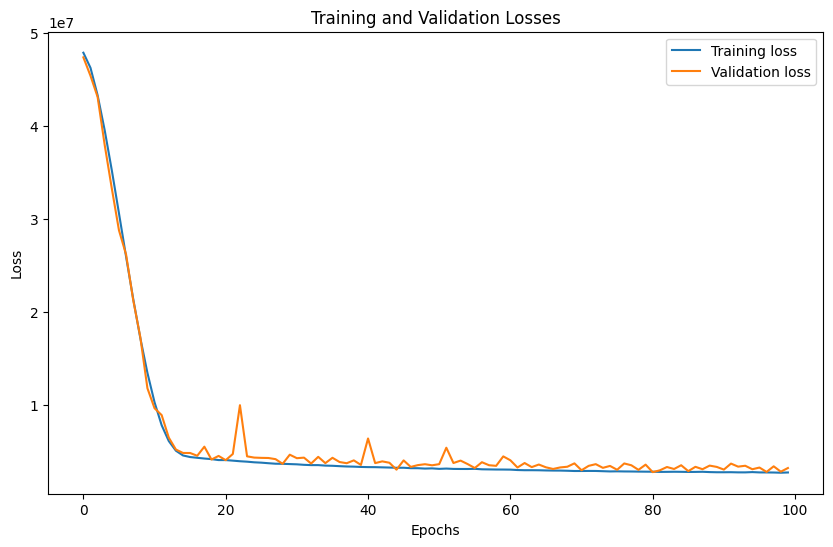

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_graph.png')
plt.show()

In [122]:
# Load the best model
model.load_state_dict(torch.load('model.pt'))

# Switch model to the evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

# Create a submission dataframe
submission_df = pd.DataFrame({'Id': test_df.index + 1, 'Sales': predictions.flatten()})

# Save the submission dataframe as a csv file
submission_df.to_csv('sample_submission.csv', index=False)